In [1]:
import seaborn as sns
import pandas as pd
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import shap
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
# Create a DataFrame object
from sklearn import preprocessing
data_df = pd.DataFrame(df, columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke'])
 
# Iterate over column names
for column in data_df:
  
    label_encoder = preprocessing.LabelEncoder()
    
    data_df[column]= label_encoder.fit_transform(data_df[column])  
    data_df[column].unique()

In [5]:
df=data_df

In [7]:
# Define feature set
X = df.drop('stroke', axis=1)

# Define diagnosis as integer: maliganant (1) or benign (0)
y = (df['stroke'])

In [8]:
# adding column name to the respective columns
X.columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
            'avg_glucose_level', 'bmi', 'smoking_status']

In [9]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= y,test_size=0.2)#random_state =0,

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter

In [16]:
os=SMOTETomek()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 3889, 1: 199})
The number of classes after fit Counter({0: 3739, 1: 3739})


In [17]:
X_train_ns_scale=scaler.fit_transform(X_train_ns)
X_test_scale=scaler.transform(X_test)

0.8209393346379648
SVM TRAIN 0.8712222519390211
FOR TEST DATA
[[816 156]
 [ 27  23]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       972
           1       0.13      0.46      0.20        50

    accuracy                           0.82      1022
   macro avg       0.55      0.65      0.55      1022
weighted avg       0.93      0.82      0.87      1022

roc_auc_score 0.649753086419753


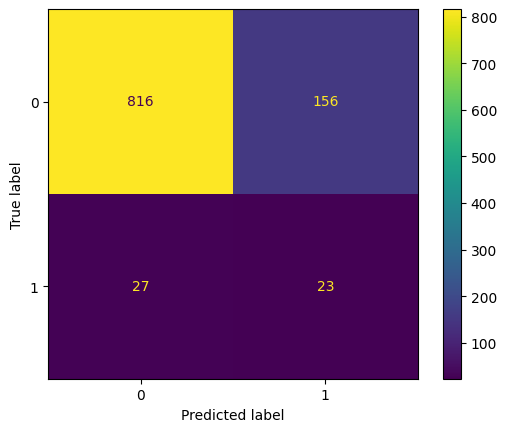

In [18]:
"""Support Vector Machine"""

from sklearn.svm import SVC
svc = SVC(C=100,gamma=.1, probability=True)
svc = svc.fit(X_train_ns_scale, y_train_ns)

y_pred_test_svm = svc.predict(X_test_scale)
y_pred_train_svm = svc.predict(X_train_ns_scale)
print(metrics.accuracy_score(y_test, y_pred_test_svm))

import sklearn.metrics as metrics
scores_svm=metrics.accuracy_score(y_train_ns,y_pred_train_svm)
print("SVM TRAIN",scores_svm) 

print("FOR TEST DATA")
metrics.roc_curve(y_test, y_pred_test_svm)
print(metrics.confusion_matrix(y_test, y_pred_test_svm))
print(metrics.classification_report(y_test, y_pred_test_svm))
print("roc_auc_score",roc_auc_score(y_test, y_pred_test_svm))

cm = confusion_matrix(y_test, y_pred_test_svm, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)
disp.plot()
plt.show()

0.7915851272015656
LR TRAIN 0.8360524204332709
FOR TEST DATA
[[782 190]
 [ 23  27]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.12      0.54      0.20        50

    accuracy                           0.79      1022
   macro avg       0.55      0.67      0.54      1022
weighted avg       0.93      0.79      0.85      1022

roc_auc_score 0.6722633744855967


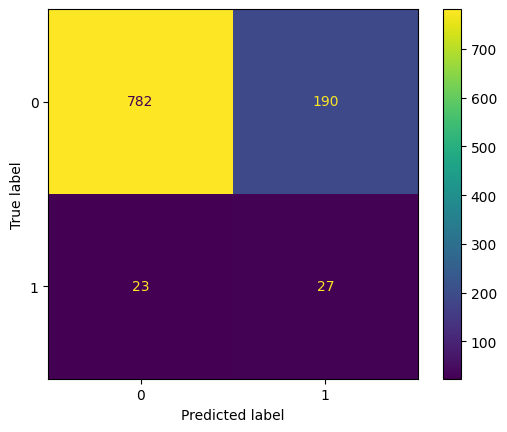

In [19]:
"""Logistic regression"""

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_ns_scale, y_train_ns)

y_pred_test_lr = lr.predict(X_test_scale)
y_pred_train_lr = lr.predict(X_train_ns_scale)
print(metrics.accuracy_score(y_test, y_pred_test_lr))

import sklearn.metrics as metrics
scores_svm=metrics.accuracy_score(y_train_ns,y_pred_train_lr)
print("LR TRAIN",scores_svm) 

print("FOR TEST DATA")
metrics.roc_curve(y_test, y_pred_test_lr)
print(metrics.confusion_matrix(y_test, y_pred_test_lr))
print(metrics.classification_report(y_test, y_pred_test_lr))
print("roc_auc_score",roc_auc_score(y_test, y_pred_test_lr))

cm = confusion_matrix(y_test, y_pred_test_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lr.classes_)
disp.plot()
plt.show()

0.8894324853228963
RF TRAIN 1.0
FOR TEST DATA
[[899  73]
 [ 40  10]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.12      0.20      0.15        50

    accuracy                           0.89      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.92      0.89      0.90      1022

roc_auc_score 0.5624485596707819


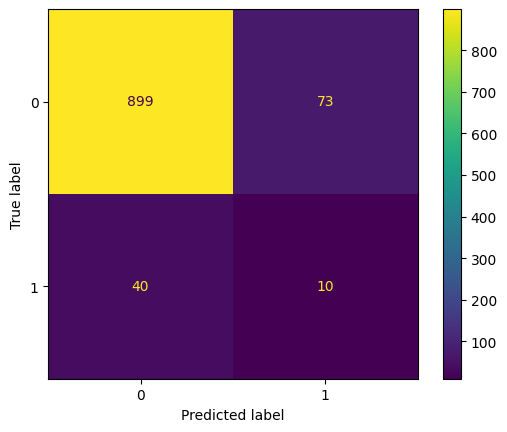

In [20]:
"""Random forest"""

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train_ns, y_train_ns)

y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train_ns)
print(metrics.accuracy_score(y_test, y_pred_test_rf))

import sklearn.metrics as metrics
scores_rf=metrics.accuracy_score(y_train_ns,y_pred_train_rf)
print("RF TRAIN",scores_rf) 

print("FOR TEST DATA")
metrics.roc_curve(y_test, y_pred_test_rf)
print(metrics.confusion_matrix(y_test, y_pred_test_rf))
print(metrics.classification_report(y_test, y_pred_test_rf))
print("roc_auc_score",roc_auc_score(y_test, y_pred_test_rf))

cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
disp.plot()
plt.show()

In [21]:
y_pred_test_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#explaining model
rf_explainer = shap.TreeExplainer(rf)
shap_values_rf = rf_explainer.shap_values(X_test)

0.7808219178082192
XGB TRAIN 0.854239101364001
FOR TEST DATA
[[771 201]
 [ 23  27]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.12      0.54      0.19        50

    accuracy                           0.78      1022
   macro avg       0.54      0.67      0.53      1022
weighted avg       0.93      0.78      0.84      1022

roc_auc_score 0.6666049382716049


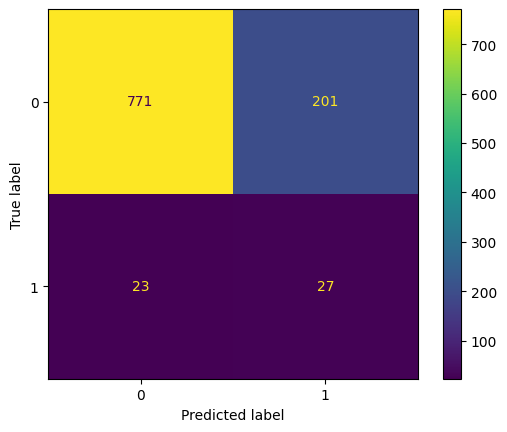

In [23]:
"""XGBClassifier"""

import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=2, n_estimators=20)
xgb = xgb.fit(X_train_ns, y_train_ns)

y_pred_test_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train_ns)
print(metrics.accuracy_score(y_test, y_pred_test_xgb))

import sklearn.metrics as metrics
scores_rf=metrics.accuracy_score(y_train_ns,y_pred_train_xgb)
print("XGB TRAIN",scores_rf) 

print("FOR TEST DATA")
metrics.roc_curve(y_test, y_pred_test_xgb)
print(metrics.confusion_matrix(y_test, y_pred_test_xgb))
print(metrics.classification_report(y_test, y_pred_test_xgb))
print("roc_auc_score",roc_auc_score(y_test, y_pred_test_xgb))

cm = confusion_matrix(y_test, y_pred_test_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb.classes_)
disp.plot()
plt.show()

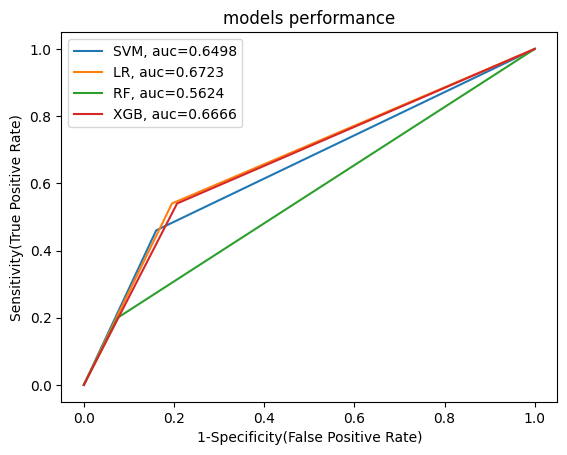

In [24]:
"""Plotting Various Matrix"""

plt.figure(0).clf()


fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_test_svm)
auc = metrics.roc_auc_score(y_test, y_pred_test_svm)
plt.plot(fpr,tpr,label="SVM, auc="+str('{0:.4f}'.format(auc)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_test_lr)
auc = metrics.roc_auc_score(y_test, y_pred_test_lr)
plt.plot(fpr,tpr,label="LR, auc="+str('{0:.4f}'.format(auc)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_test_rf)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)
plt.plot(fpr,tpr,label="RF, auc="+str('{0:.4f}'.format(auc)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_test_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_test_xgb)
plt.plot(fpr,tpr,label="XGB, auc="+str('{0:.4f}'.format(auc)))

plt.title("models performance")
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.legend(loc=0)

In [25]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score

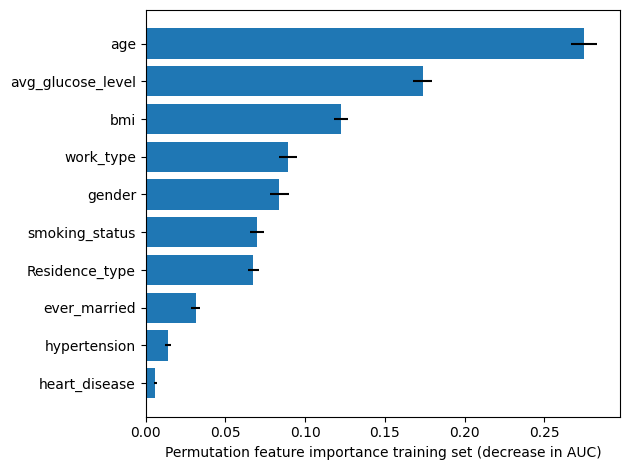

In [26]:
# Feature importance based on TRAINING set
perm_test = PermutationImportance(rf, scoring=make_scorer(roc_auc_score),
                                   n_iter=50, random_state=1, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train_ns, y_train_ns)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(len(X_test.columns))], 'feature_name': X_test.columns.values})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)
 

## Barplot with confidence intervals
import matplotlib.pyplot as plt
height = ordered_df['weight']
bars = ordered_df['feature_name']
ci = 1.96 * ordered_df['std']
y_pos = np.arange(len(bars))

import matplotlib.pyplot as plt
# Create horizontal bars
plt.barh(y_pos, height, xerr=ci)

# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Permutation feature importance training set (decrease in AUC)")
plt.tight_layout()

# Show graphic
plt.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.31500548677908186
Prediction_local [0.04840107]
Right: 0.05


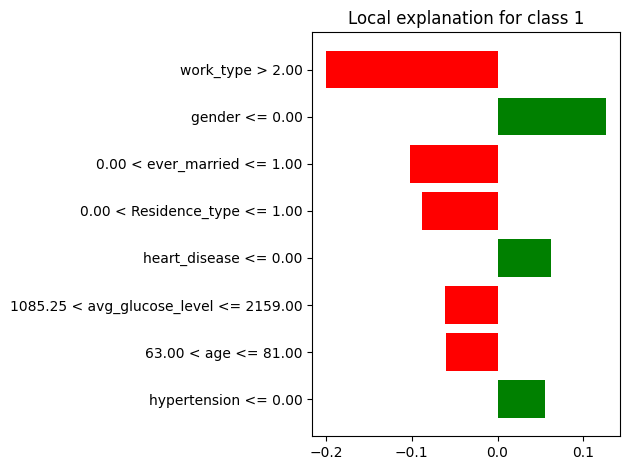

In [27]:
import lime
from lime import lime_tabular
#Explain samples in test set

X_train_ns1 = pd.DataFrame(X_train_ns)
X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train_ns1.values,
                                                   feature_names=X_train_ns.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=['0', '1'],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=1)


X_explain1 = pd.DataFrame(X_explain)
#Explaining first subject in test set using all 13 features
exp = explainer.explain_instance(X_explain1.values[4,:],rf.predict_proba,num_features=8)

#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
#exp.show_in_notebook(show_table=True)

In [28]:
exp.show_in_notebook(show_table=True)

In [29]:
shap.initjs()

In [30]:
shap.force_plot(rf_explainer.expected_value[0],shap_values_rf[0][4,:], X_test.iloc[4,:]) 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


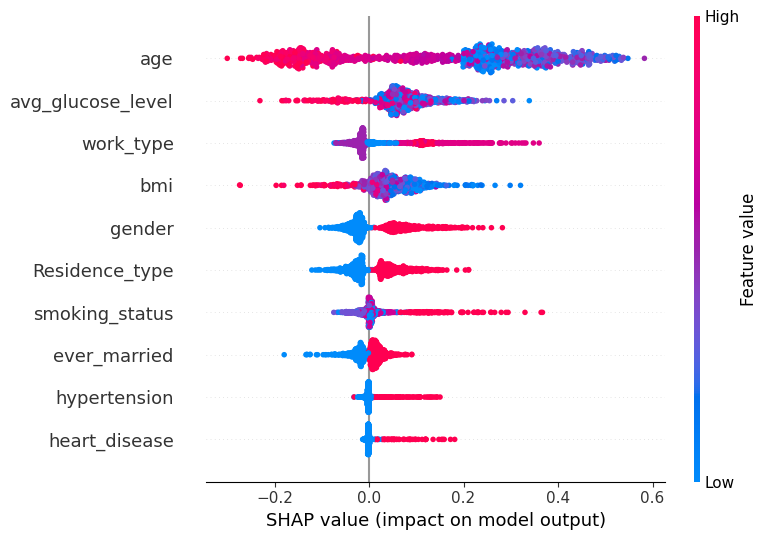

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


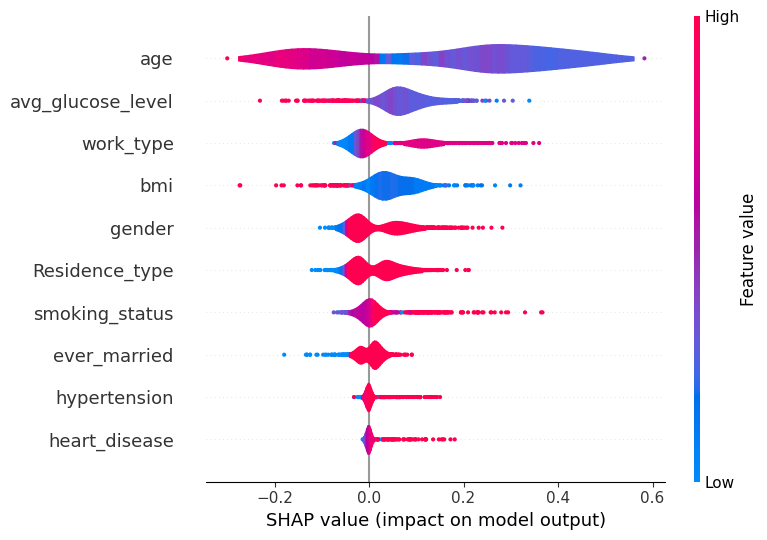

In [32]:
shap.summary_plot(shap_values_rf[0], X_test)
shap.summary_plot(shap_values_rf[0], X_test, plot_type="violin") 

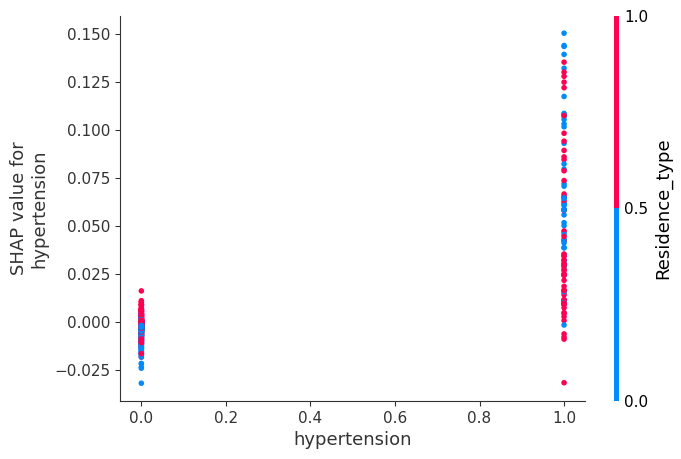

In [33]:
shap.dependence_plot("hypertension", shap_values_rf[0], X_test)

In [34]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [35]:
shap.initjs()
shap.force_plot(rf_explainer.expected_value[0], shap_values_rf[0], X_test)